In [3]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
from utils.metrics import rel_err, rank_corr, mse_K
from numba import autojit

# Load data
- **kernel** should be in [**exp_d100**, **plaw_d10**, **rect_d100**]
- **mode** should be in [**nonsym**, **sym**, **sym_hard**]
- **log10T** should be in [**5**, **6**, **7**, **8**, **9**]

In [4]:
kernel = 'plaw_d10'
mode = 'nonsym'
log10T = 7
url = 'https://s3-eu-west-1.amazonaws.com/nphc-data/{}_{}_log10T{}_with_Beta_without_N.pkl.gz'.format(kernel, mode, log10T)

In [5]:
from utils.loader import load_data
cumul, Beta = load_data(url)

# Estimation procedure

In [6]:
from nphc2.solver import admm
from utils.prox import *
d = cumul.dim
X0 = np.eye(d)
from scipy.linalg import inv
Alpha_true = np.eye(d) - inv(cumul.R_true)
#X0 = np.ones(d**2).reshape(d,d)
rho = .01
maxiter = 10000

In [7]:
res = []
for prox in [prox_sq_frob, prox_l1, prox_nuclear]:
    X_ = admm(cumul, prox, X0, X0, Alpha_true, rho=rho, maxiter=maxiter)
    res.append(X_)

In [8]:
X_frob = res[0]
X_l1 = res[1]
X_nuc = res[2]

# Results

In [9]:
from utils.metrics import rel_err, rank_corr
import pandas as pd
cols = ['RelErr', 'RankCorr']
index = ['frobenius', '\ell_1', 'nuclear norm']
results = np.zeros((len(index),len(cols)))
for i, X in enumerate([X_frob, X_l1, X_nuc]):
    results[i][0] = rel_err(Alpha_true, X)
    results[i][1] = rank_corr(Alpha_true, X)
df = pd.DataFrame(results, index=index, columns=cols)
df

,RelErr,RankCorr
frobenius,0.145319,0.272890
\ell_1,0.149834,0.285700
nuclear norm,0.145310,0.273833


# Heatmaps

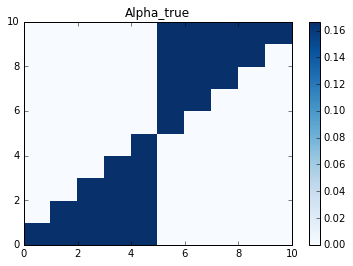

In [10]:
plt.pcolor(Alpha_true,cmap=plt.cm.Blues)
plt.title("Alpha_true")
plt.colorbar()
plt.show()
plt.close()

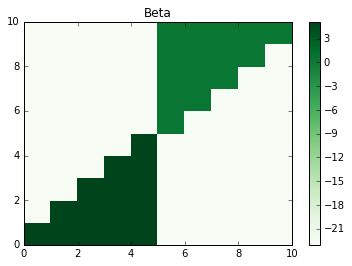

In [11]:
eps = 1e-10
plt.pcolor(np.log(eps+Beta),cmap=plt.cm.Greens)
plt.title("Beta")
plt.colorbar()
plt.show()
plt.close()

In [14]:
cumul.set_C()
plt.pcolor(cumul.C,cmap=plt.cm.Reds)
plt.title("Covariance matrix")
plt.colorbar()
plt.show()
plt.close()

TypeError: 'NoneType' object has no attribute '__getitem__'

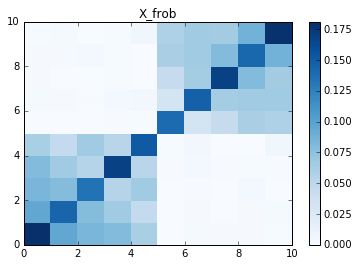

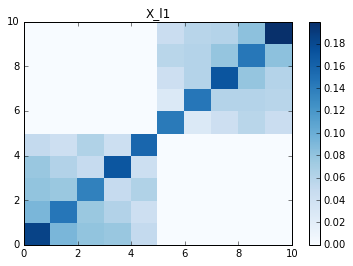

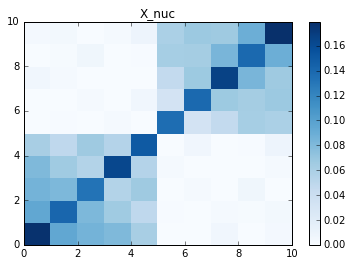

In [15]:
for i,X in enumerate(res):
    plt.pcolor(X,cmap=plt.cm.Blues)
    if i == 0:
        title = 'X_frob'
    elif i == 1:
        title = 'X_l1'
    else:
        title = 'X_nuc'
    plt.title(title)
    plt.colorbar()
    plt.show()
    plt.close()